# 📌Introduction   
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form..

# 📌 Bussiness Task
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# 📌 Business Goal
By the end of this case study , you would be able to answer below questions.
1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2- Who are your target customers with whom you can start marketing strategy [easy to converse]
3- How the marketing strategy works in real world|.

I hope you find this NoteBook helpful and some <span style="color:red;">**UPVOTES**</span> would be appreciated.


# 📌Data Analysis Summary 
<font size="4" color="blue">**General info** </font> 🌍 
1. youth with age 32  is the most  mall vistores  and mean age of visitor is 38.
2. the most anuall income  in mall per vistor is 54 K
3. average spending score is 50.
4. Negative relation shop between age and spending score
5. no corrolation detected on data set




# 📌Import libraries .


In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# from matplotlib.pyplot.bar_label
import seaborn as sns;
from scipy import stats
import glob
import random
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.cm as cm
import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
# import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
#clustring 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
seed = 42
np.random.seed =seed



# 📌Helper Function ⚒





In [3]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

# def car_name(x):
#     carname  = x.split(' ')[0]
#     return carname

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel 
            
# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq

def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay
    
def calc_day_of_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
    
def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]       
    return x
    
def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]       
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target
    #draw distplot for all numeric columns just pass numerical column
def all_distplot (numCol):
    plt.figure(1 , figsize = (20 , 6))
    n = 0 
    for x in numCol:
        n += 1
        plt.subplot(1 , len(numCol) , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.distplot(df[x] , bins = 20)
        plt.title('Distplot of {}'.format(x))
    plt.show()    
     
def box_plot(df):
    i=1
    plt.figure(figsize = (20,50))
    for col in df.columns:
        plt.subplot(round(len(df.columns)/3),3,i)
        sns.boxplot(x = df[col], data = df,width = 0.5, fliersize = 3, linewidth = 1)
        i+=1       

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

# 📌Reading Data 

In [4]:
df = pd.read_csv("./Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<h4 id="1.1-|-set dataset columns to lower"><b>1.1 <span style="color:#4a8fdd">|</span> set dataset columns to lower</b></h4>





In [5]:
#set colimn name to lower
df = df.rename(columns=str.lower)

<h4 id="1.2-|-set dataset columns values  to lower"><b>1.2 <span style="color:#4a8fdd">|</span> set dataset columns values to lower</b></h4>


In [6]:
for col in df.columns :
    if df[col].dtype == 'object':
       df[col] = df[col].apply(lowerCase)    
df    

,customerid,gender,age,annual income (k$),spending score (1-100)
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40
...,...,...,...,...,...
195,196,female,35,120,79
196,197,female,45,126,28
197,198,male,32,126,74
198,199,male,32,137,18


<h4 id="1.3-|-rename Columns"><b>1.2 <span style="color:#4a8fdd">|</span>  rename Columns</b></h4>


In [7]:
df.rename(columns = {"annual income (k$)": "annual_income",
                      "spending score (1-100)": "spending_score",
                     'customerid' :'customer_id' }, inplace = True)

In [8]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40
...,...,...,...,...,...
195,196,female,35,120,79
196,197,female,45,126,28
197,198,male,32,126,74
198,199,male,32,137,18


<h4 id="1.2-|-dataset shape"><b>1.2 <span style="color:#4a8fdd">|</span> dataset shape</b></h4>

In [9]:
df.shape

(200, 5)

In [10]:
print("The number of rows in  data is {} , \nThe number of columns in  data is {}".format(df.shape[0], df.shape[1])) 

The number of rows in  data is 200 , 
The number of columns in  data is 5


# 📌Data Cleaning
*   check column type.
*   drop un necessary column.
*   check duplicate data 
*   check  missing value.
*   dealing with missing value




<h4 id="2.1-|-dataset information"><b>2.1 <span style="color:#4a8fdd">|</span> dataset information</b></h4>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['customer_id', 'age', 'annual_income', 'spending_score']

In [13]:
catColumn  = [col for col in df.columns if  df[col].dtype == "O"]
catColumn

['gender']

<h4 id="2.2-|-dataset statistics"><b>2.2 <span style="color:#4a8fdd">|</span> dataset statistics</b></h4>

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<h4 id="2.3-|-dataset check duplicate Data"><b>2.3 <span style="color:#4a8fdd">|</span> dataset check duplicate Data</b></h4>

In [15]:
#check duplicate data 
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

<h4 id="2.4-|- check Null Data"><b>2.4 <span style="color:#4a8fdd">|</span>  check Null Data</b></h4>

In [16]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

<AxesSubplot:>

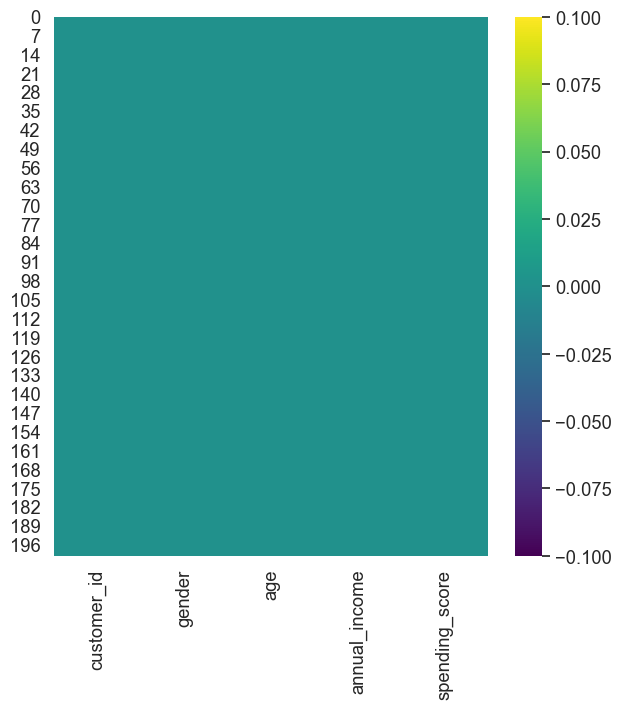

In [17]:
cols =df.columns
sns.heatmap(df[cols].isnull(), cmap='viridis')

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Dataset Basic Informations</center></h3>
<p>● The dataset consists of 200 rows and 5 columns. </p>
<p>● We have 4 column as Numerical column and 1 categorical column   .</p>
<p>● There is no null data inside columns.</p>
<p>● No duplicate data in dataset .</p>

</div>
</div>

In [18]:
df

,customer_id,gender,age,annual_income,spending_score
0,1,male,19,15,39
1,2,male,21,15,81
2,3,female,20,16,6
3,4,female,23,16,77
4,5,female,31,17,40
...,...,...,...,...,...
195,196,female,35,120,79
196,197,female,45,126,28
197,198,male,32,126,74
198,199,male,32,137,18


In [19]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 📌Data Analaysis & Visualization
in this part we will analays and versialize each part of data to be in near step from our goal then pased on deployed models we will sense best factior that affect on our bussiness goal



# 📌Dealing With Numerical Data .




<h4 id="3.2-|- get num  column"><b>3.2 <span style="color:#4a8fdd">|</span> get num  column</b></h4>

In [20]:
#get all numerical column 
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['customer_id', 'age', 'annual_income', 'spending_score']


<h4 id="3.3-|- distplot for neumerical data"><b>3.3 <span style="color:#4a8fdd">|</span> distplot for neumerical data</b></h4>



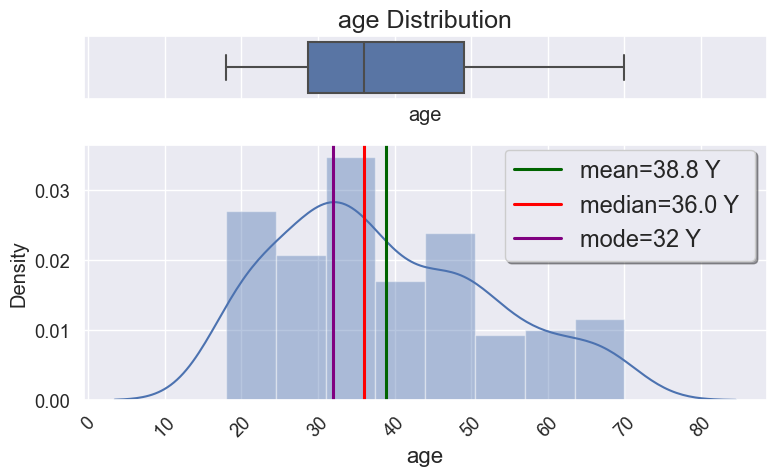

In [29]:
numerical_plotting(df,'age','age Distribution',' Y ')



In [30]:
df.describe()[['age']].T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0


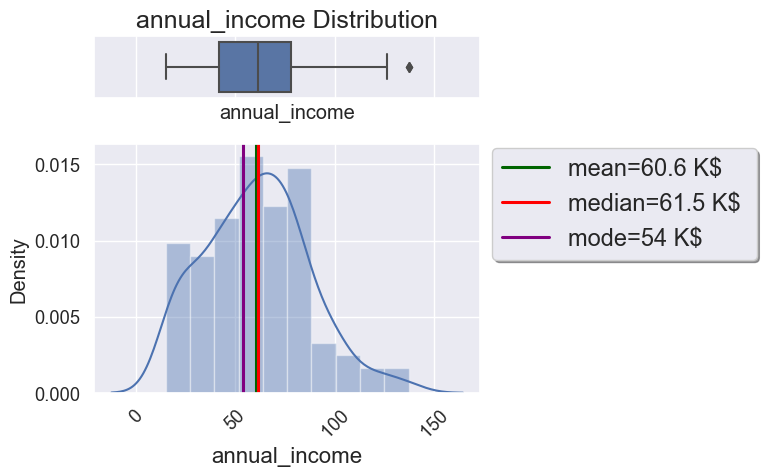

In [31]:
numerical_plotting(df,'annual_income','annual_income Distribution',' K$ ')


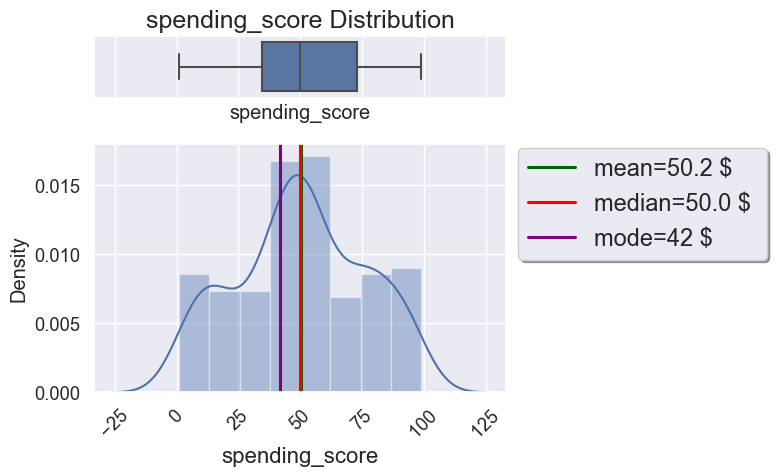

In [32]:
numerical_plotting(df,'spending_score','spending_score Distribution',' $ ')

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Basic Numeric analaysis</center></h3>
<p>● youth with age 32  is the most  mall vistores  and mean age of visitor is 38.2 .</p>
<p>● the most anuall income  in mall per vistor is 54 K</p>
<p>● average spending score is 50.</p>
</div>
</div>


<h4 id="3.4-|- Box Plot"><b>3.4 <span style="color:#4a8fdd">|</span>   Box Plot</b></h4>



Text(0.5, 1.0, 'relationship between gender and spending_score variables')

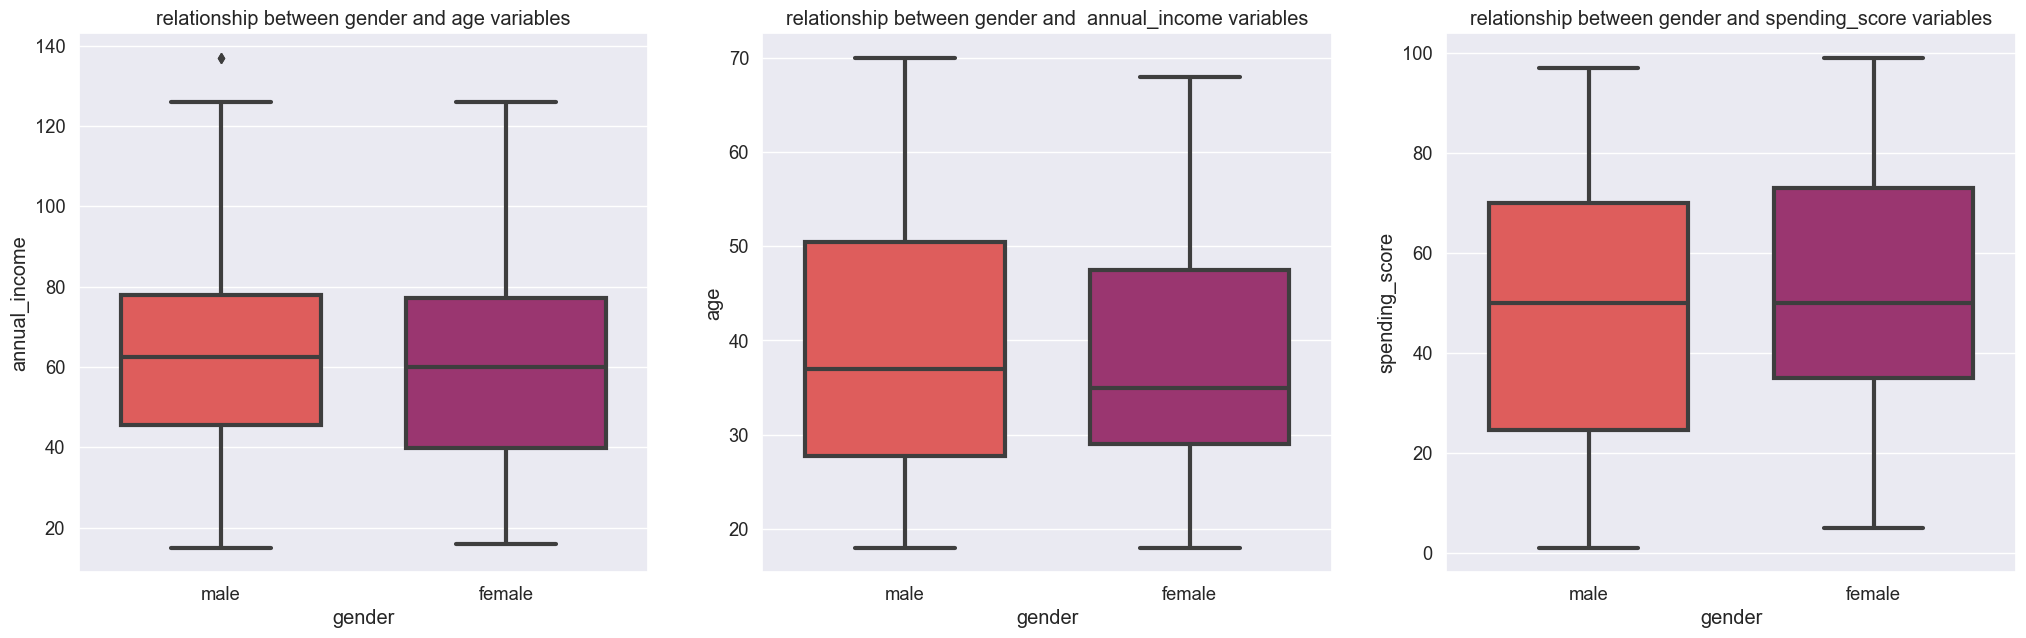

In [33]:

fig, axes = plt.subplots(1, 3, figsize = (25, 7))

sns.boxplot(ax = axes[0], x = "gender", y = "annual_income", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between gender and  annual_income variables");

sns.boxplot(ax = axes[1], x = "gender", y = "age", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship between gender and age variables"); 

sns.boxplot(ax = axes[2], x = "gender", y = "spending_score", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[2].set_title("relationship between gender and spending_score variables")


<h4 id="3.5-|- Heat Map"><b>3.5 <span style="color:#4a8fdd">|</span>   Heat Map </b></h4>



In [34]:
df.corr()

,customer_id,age,annual_income,spending_score
customer_id,1.000000,-0.026763,0.977548,0.013835
age,-0.026763,1.000000,-0.012398,-0.327227
annual_income,0.977548,-0.012398,1.000000,0.009903
spending_score,0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

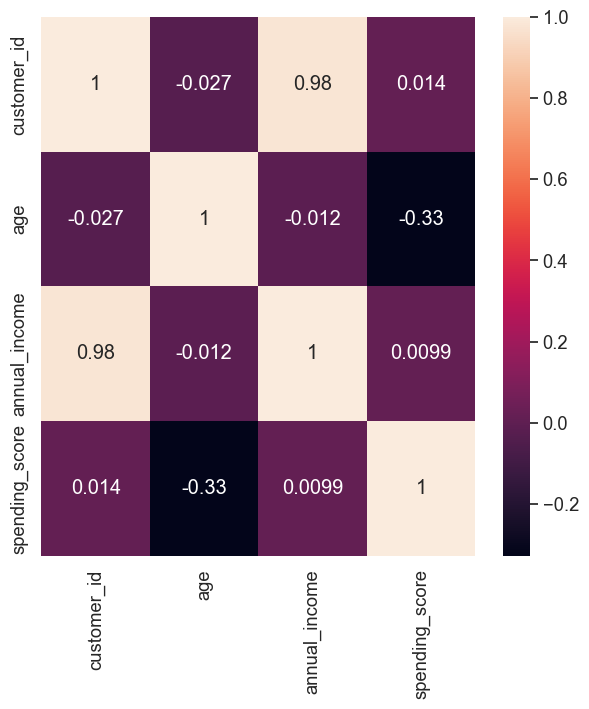

In [35]:
sns.heatmap(data=df.corr(),annot = True)

<div class="alert alert-block alert-info"> 
from above we can confirme that :


1.   no corrolation detected between in data
2.   corrolation with value -.33 can be neglected .



.</div>


<h4 id="3.6-|- Histogram"><b>3.6 <span style="color:#4a8fdd">|</span>    Histogram </b></h4>



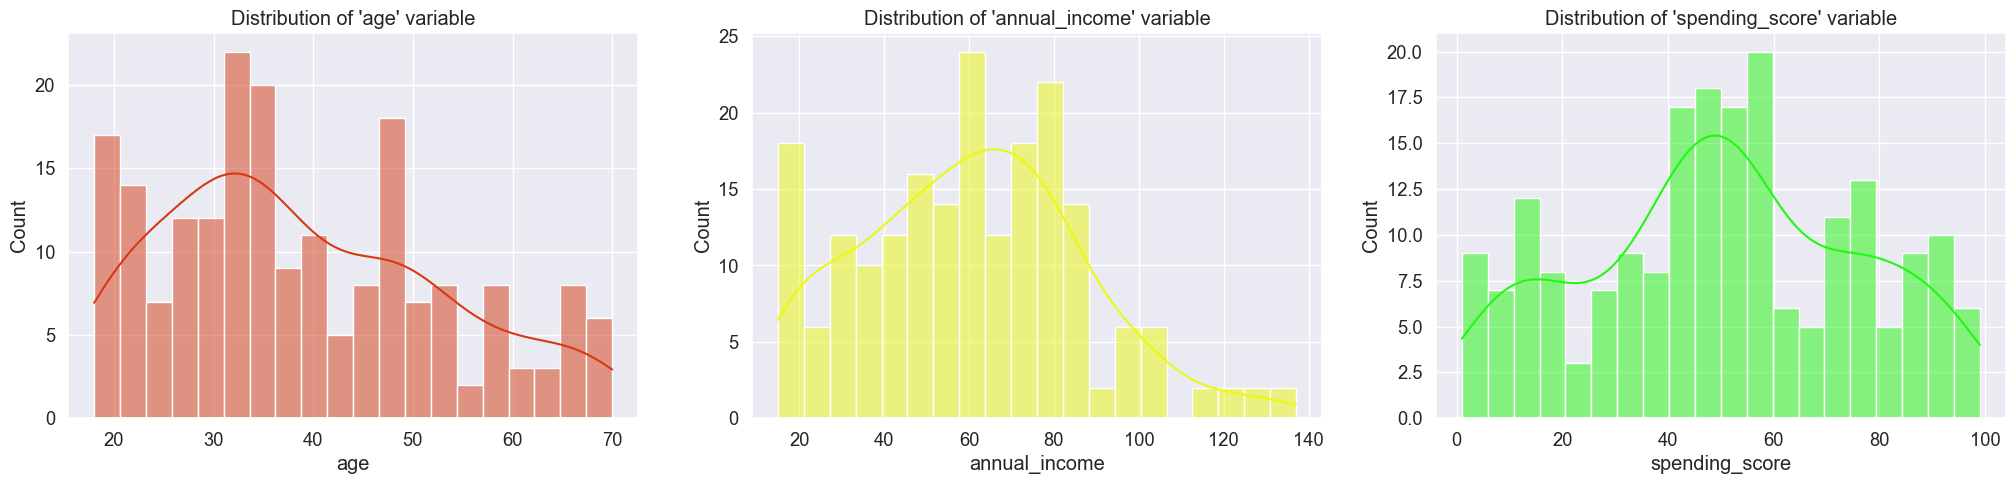

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (25, 5))
sns.histplot(ax = axes[0], x = df["age"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of 'age' variable");
sns.histplot(ax = axes[1], x = df["annual_income"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of 'annual_income' variable");
sns.histplot(ax = axes[2], x = df["spending_score"], bins = 20, kde = True, color = "#20F90E").set(title = "Distribution of 'spending_score' variable");

<div class="alert alert-block alert-info"> 

from above we can find that :

1.   Data is not normaly distributed.
.</div>


<h4 id="3.7-|- sactter Plot"><b>3.7 <span style="color:#4a8fdd">|</span>  sactter Plot</b></h4>

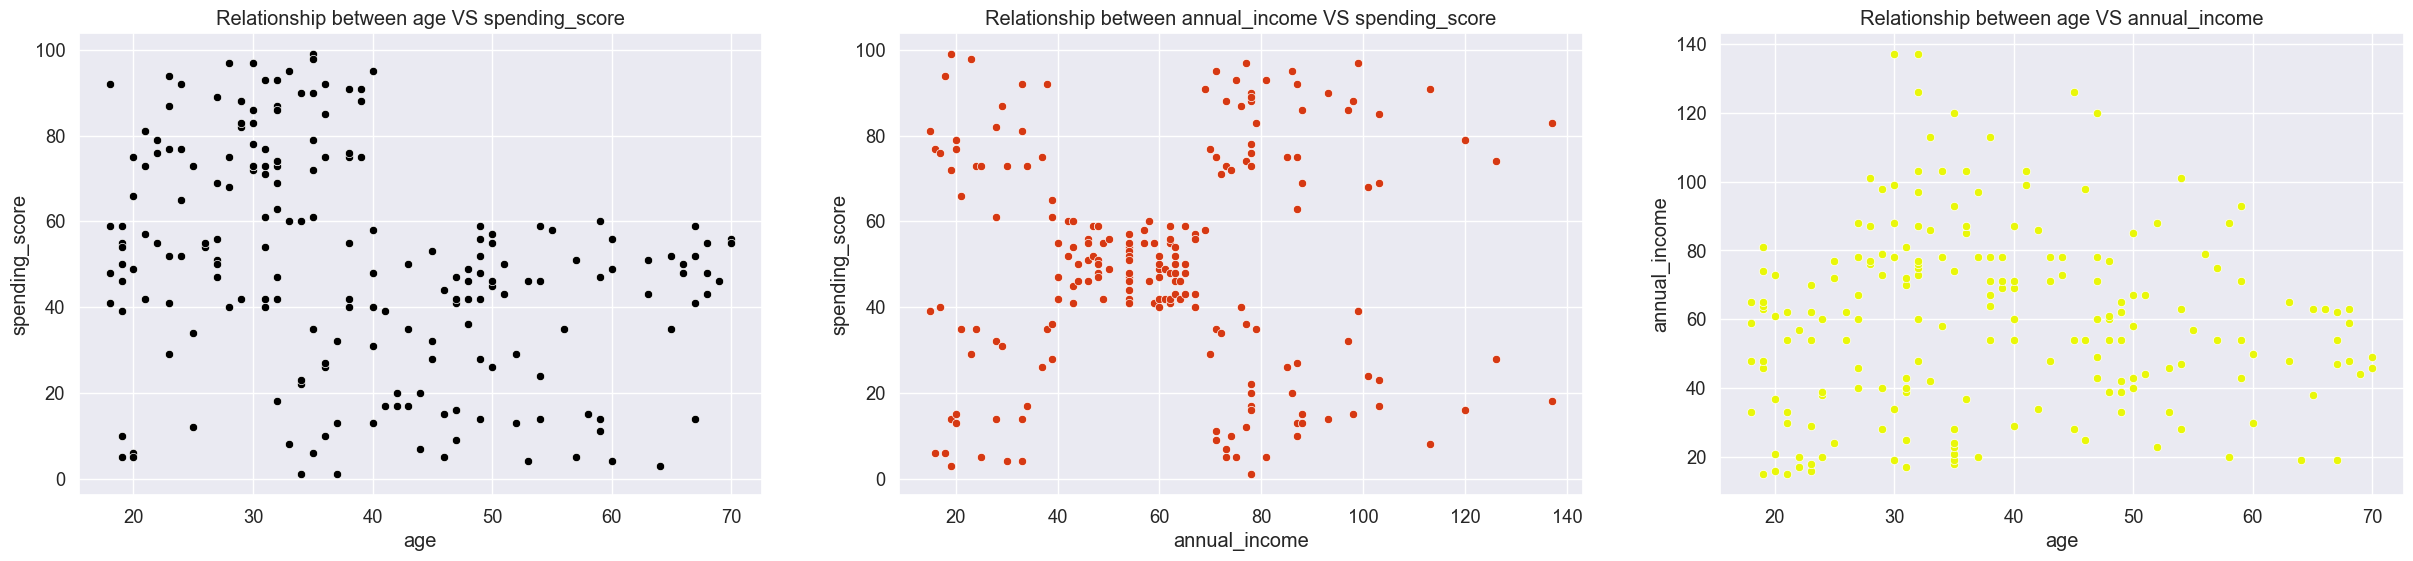

In [37]:
fig, axes = plt.subplots(1, 3, figsize = (30, 6))
axes = axes.flatten()



sns.scatterplot(ax = axes[0], x = "age", y = "spending_score", data = df, color = "#000000"
                ).set(title = "Relationship between age VS spending_score");

sns.scatterplot(ax = axes[1], x = "annual_income", y = "spending_score", data = df,
                color = "#D63913").set(title = "Relationship between annual_income VS spending_score");
sns.scatterplot(ax = axes[2], x = "age", y = "annual_income", data = df,
                color = "#E9F709").set(title = "Relationship between age VS annual_income");


<h4 id="3.8-|- Reg Plot"><b>3.8 <span style="color:#4a8fdd">|</span>  Reg Plot </b></h4>

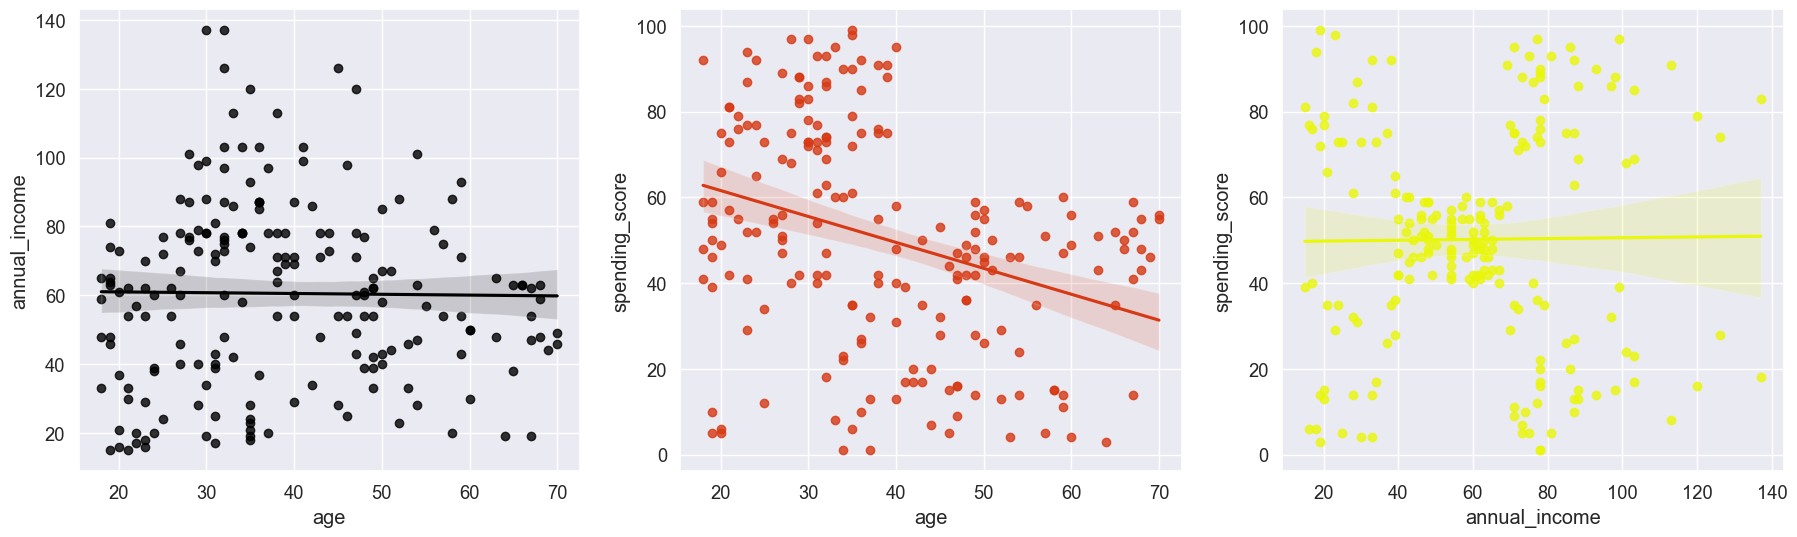

In [39]:
fig, axes = plt.subplots(1, 3, figsize = (22, 6))
sns.regplot(ax = axes[0], x = "age", y = "annual_income", data = df, color = "#000000");
sns.regplot(ax = axes[1], x = "age", y = "spending_score", data = df, color = "#D63913");
sns.regplot(ax = axes[2], x = "annual_income", y = "spending_score", data = df, color = "#E9F709");

 **attention to  Negative relation shop between age and spending score**


<h4 id="3.9-|- Dist Plot"><b>3.9 <span style="color:#4a8fdd">|</span>  Dist Plot </b></h4>

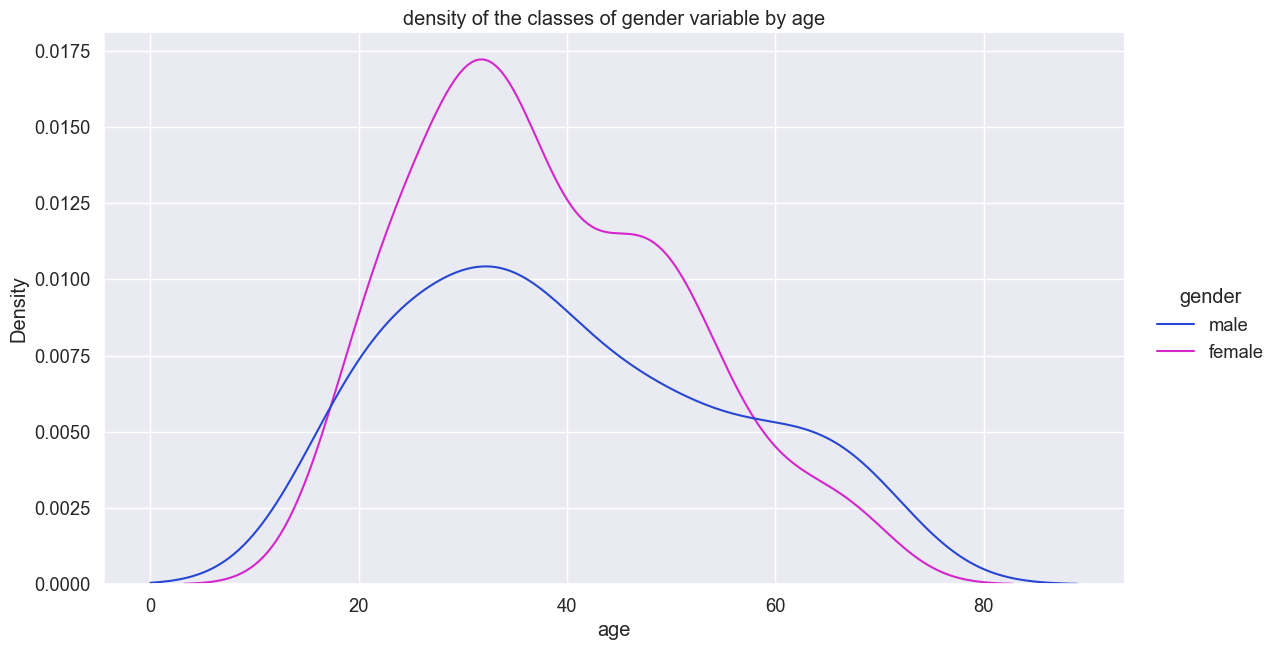

In [31]:

sns.displot(data = df, x = "age", hue = "gender", kind = "kde", height = 6.5,  aspect = 1.8, clip = (0, None),
    palette = ["#2747D3", "#D327CD"]).set(title = "density of the classes of gender variable by age");

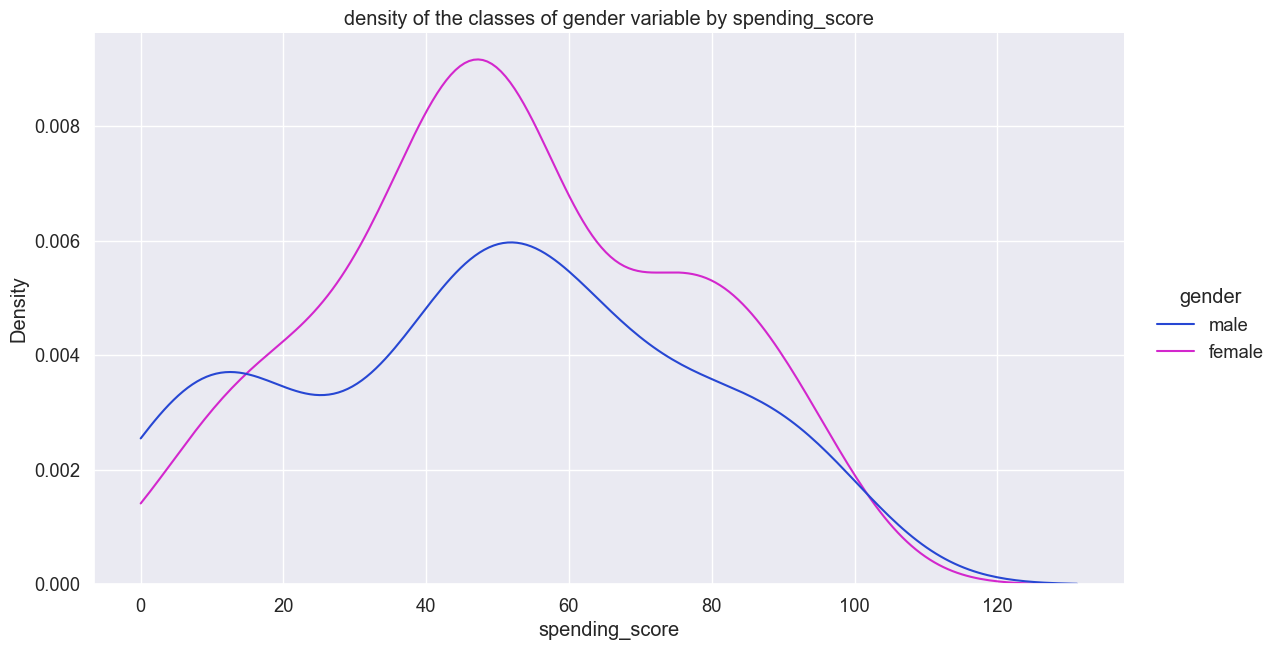

In [32]:
sns.displot(data = df, x = "spending_score", hue = "gender", kind = "kde", height = 6.5,  aspect = 1.8, clip = (0, None),
    palette = ["#2747D3", "#D327CD"]).set(title = "density of the classes of gender variable by spending_score");

<h4 id="3.10-|- joint Plot"><b>3.10 <span style="color:#4a8fdd">|</span>  joint Plot </b></h4>

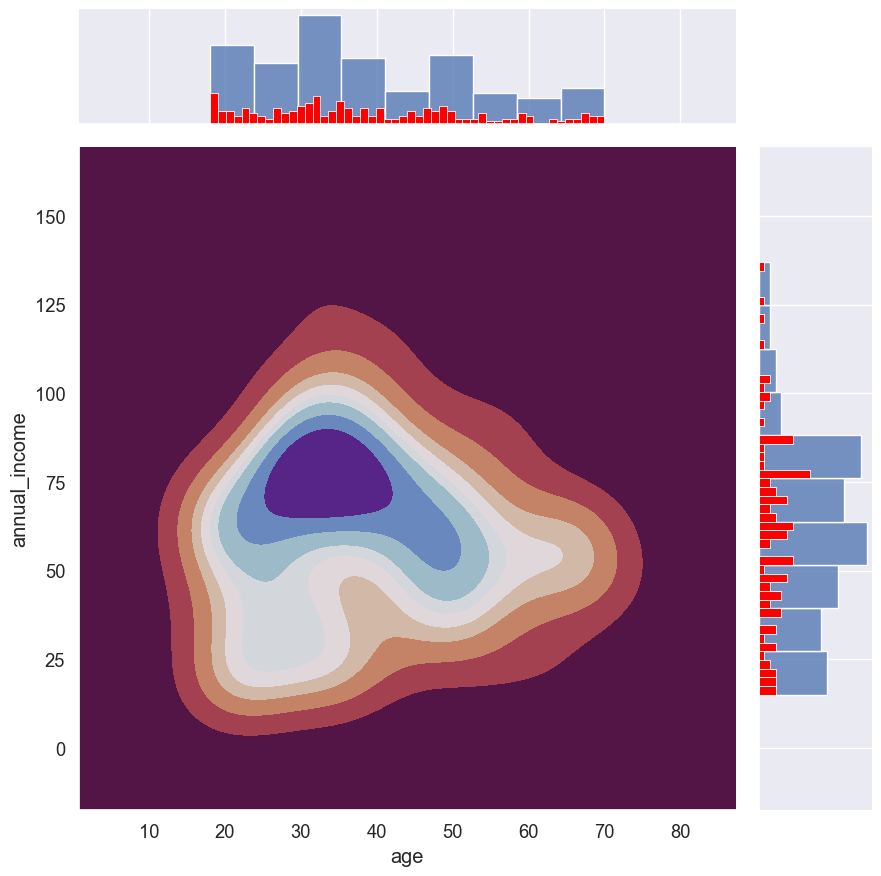

In [33]:
g = sns.jointplot(data = df, size = 9, x = "age", y = "annual_income", space = 0.2)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap ='twilight_shifted_r')
g.plot_marginals(sns.histplot, color = "red", alpha = 1, bins = 50);

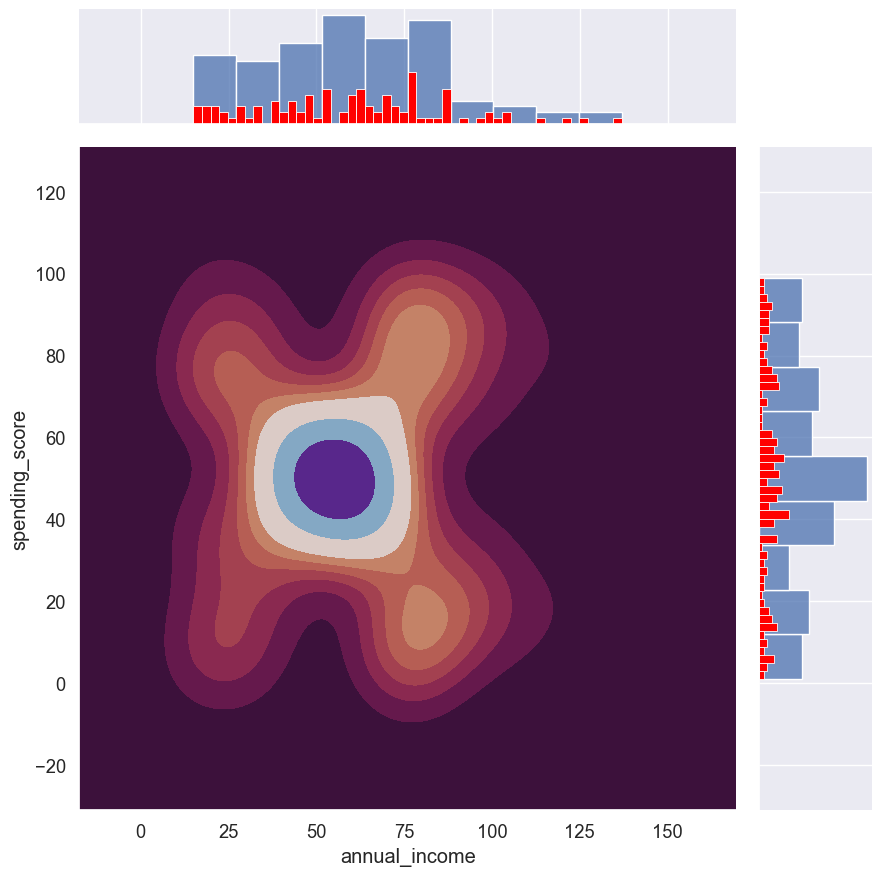

In [34]:
g = sns.jointplot(data = df, size = 9, x = "annual_income", y = "spending_score", space = 0.2)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap ='twilight_shifted_r')
g.plot_marginals(sns.histplot, color = "red", alpha = 1, bins = 50);

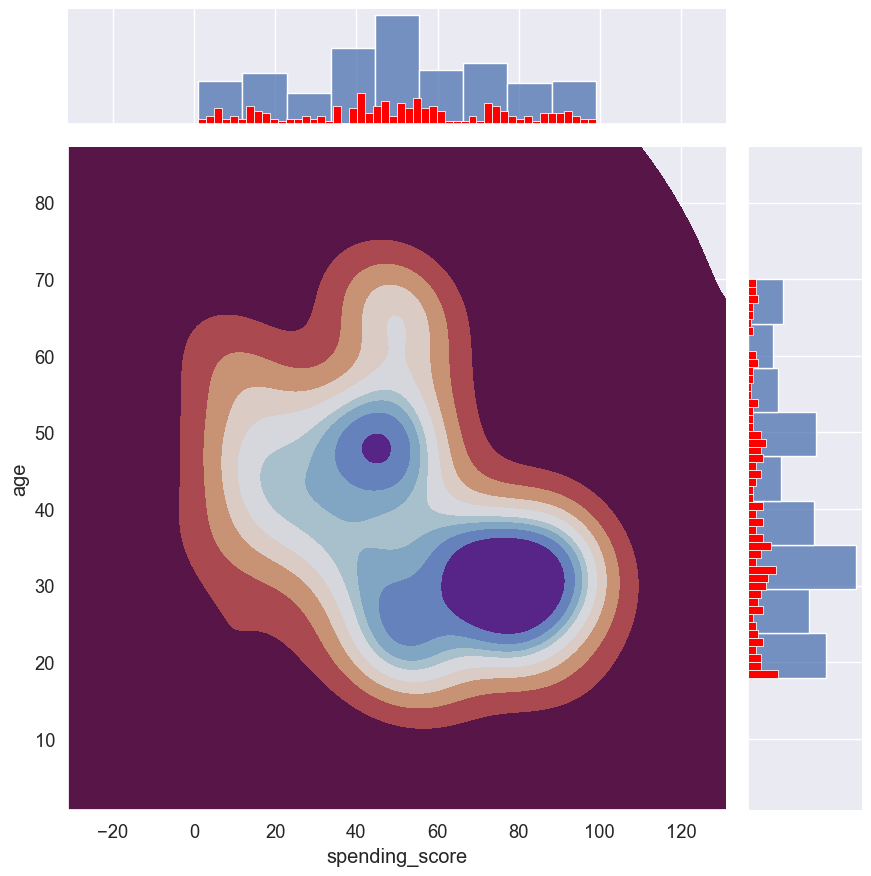

In [35]:
g = sns.jointplot(data = df, size = 9, x = "spending_score", y = "age", space = 0.2)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap ='twilight_shifted_r')
g.plot_marginals(sns.histplot, color = "red", alpha = 1, bins = 50);


<h4 id="3.11-|- Plotly"><b>3.11 <span style="color:#4a8fdd">|</span>  Plotly  </b></h4>

In [36]:
px.scatter(df, x = "age", y = "spending_score", color = "annual_income" ,opacity = 1)

In [37]:
px.scatter(df, x = "age", y = "annual_income", color = "gender" ,opacity = 1)

In [38]:
fig = px.histogram(df, x = "age", y = "annual_income", marginal = "box", color = "gender",
                   text_auto = True, width = None, height = None, nbins = 100, hover_data  = df.columns)
fig.show()

In [39]:
data = df
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [40]:
data = df[["age", "annual_income", "spending_score"]]
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

# 📌Dealing With Categorical Data .


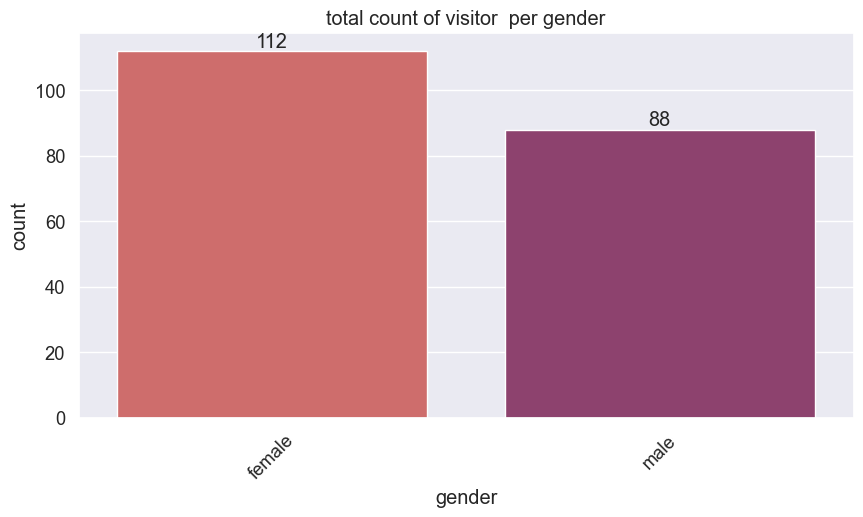

In [41]:
categorical_plotting(df,'gender','total count of visitor  per gender')

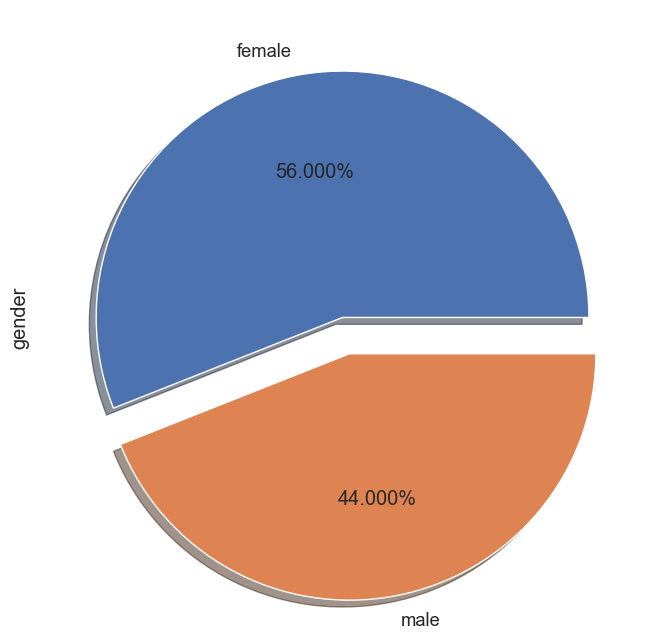

In [42]:
plt.figure(figsize = [8, 8], clear = True, )
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

In [43]:
df.groupby('gender').mean()['annual_income']

gender
female    59.250000
male      62.227273
Name: annual_income, dtype: float64

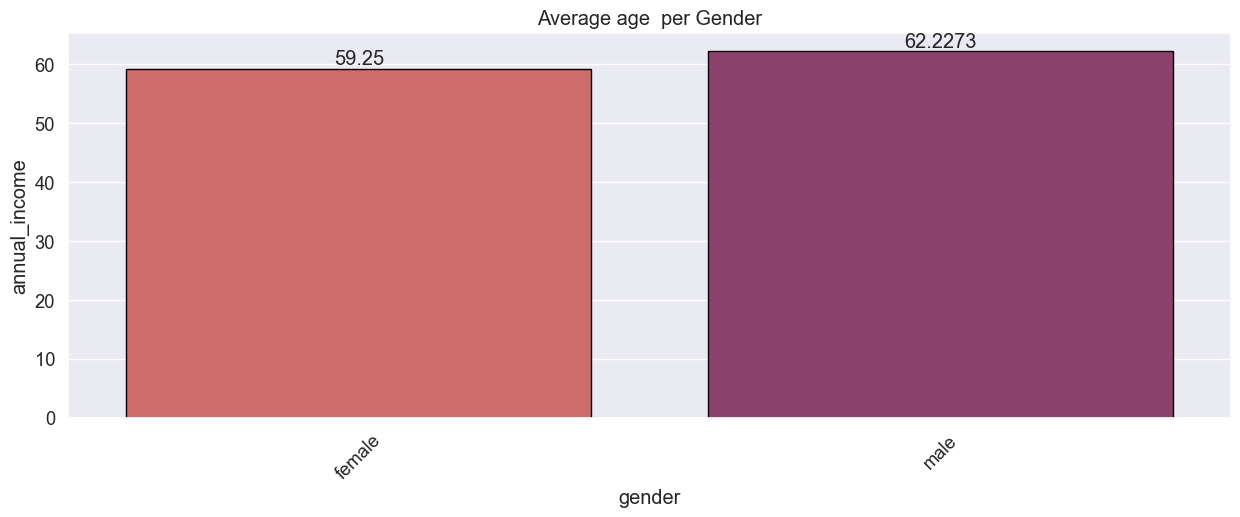

In [44]:
average_plotting(df,'gender','annual_income',15,'Average age  per Gender')

In [45]:
df.groupby('gender').mean()['spending_score']

gender
female    51.526786
male      48.511364
Name: spending_score, dtype: float64

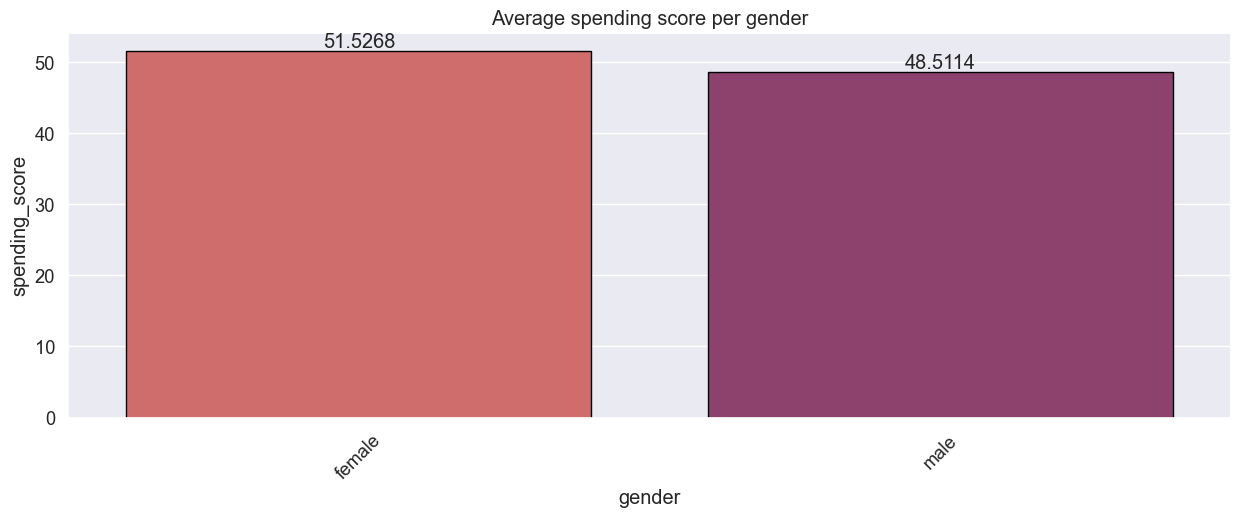

In [46]:
average_plotting(df,'gender','spending_score',15,'Average spending score per gender')

In [47]:
df.groupby('gender').max()

,customer_id,age,annual_income,spending_score
gender,,,,
female,197,68,126,99
male,200,70,137,97


In [48]:
df.groupby('gender').sum()[['annual_income']]

,annual_income
gender,
female,6636
male,5476


In [49]:
df.groupby('gender').mean()[['age']]

,age
gender,
female,38.098214
male,39.806818


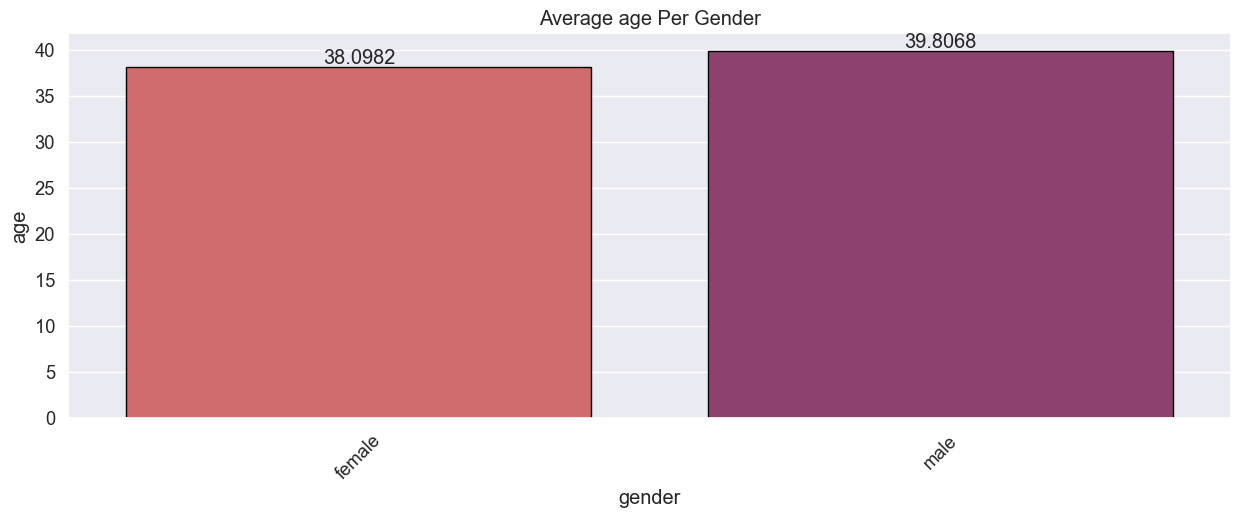

In [50]:
average_plotting(df,'gender','age',15,'Average age Per Gender')

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Categorical  Statistics Information</center></h3>
<p>● 56% of data is Female. </p>
<p>● average age per female is 39 Y and male is 38 Y  .</p>
<p>● average income per year for male is 62K and female is 59k.</p>
<p>● Total anual income for female is higher than male as 6636 K per female and  per male  5476K .</p>

</div>
</div>

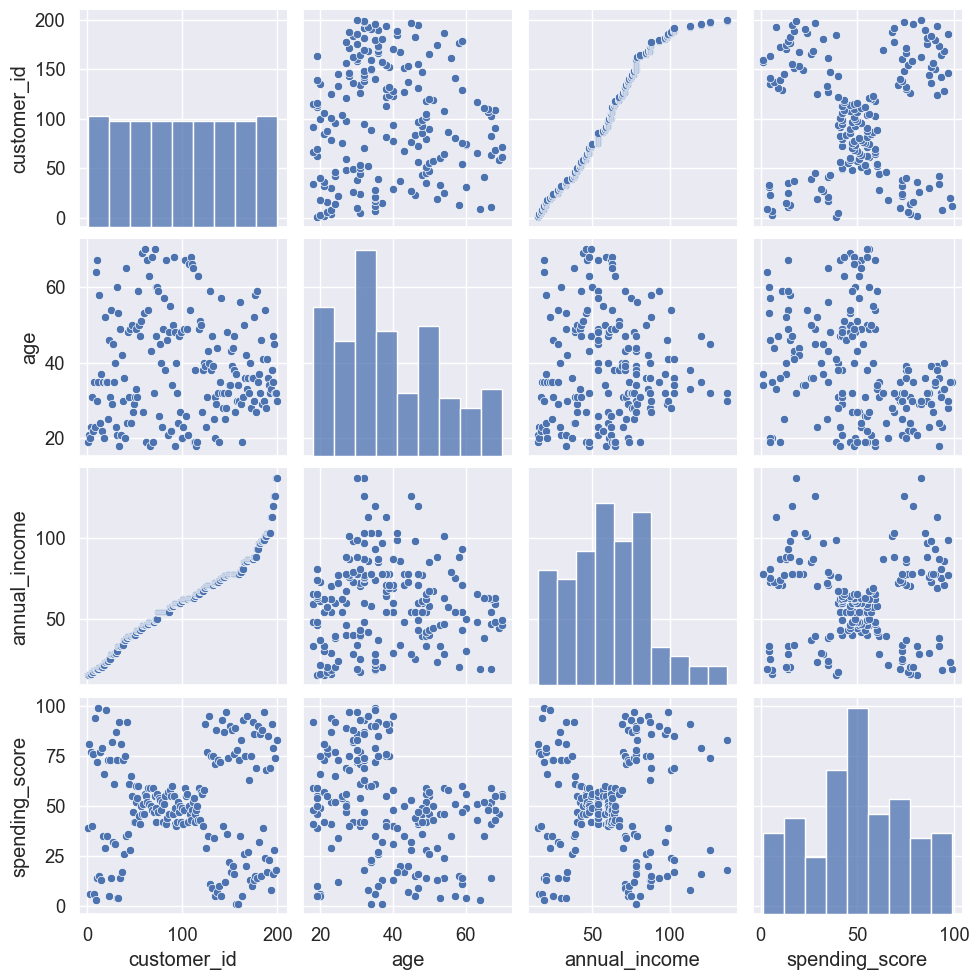

In [51]:
sns.pairplot(df)

<div class="alert alert-block alert-info"> 
from above pair plot make segmentaion between below variabbles :


1.  age and spending score
2.  annual income  and spending score .
3.  age and  annual income  and spending score.



.</div>

# 📌Data preprocessing

In [52]:
label = LabelEncoder()
df['gender']=label.fit_transform(df['gender'])

# 📌clustring using Kmeans.
**Clustering** is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features. The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc.
**K-Means Clustering**
 It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.
1) Select the number of clusters for the dataset ( K )
2) Select K number of centroids
3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups
4) Now find the original centroid in each group
5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.  


<font size="4" color="blue">**1- clustring between age and spending score**</font> </br>


In [53]:

df_one = df[['age','spending_score']]
data=[]
for n in range(1,10):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=400, 
                    tol=0.0001,  random_state= 45 ) )
    kmeans.fit(df_one)
    data.append(kmeans.inertia_)
    

<font size="4" color="red">**what is elbow methode in clustring?**</font> </br>
**In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1..**


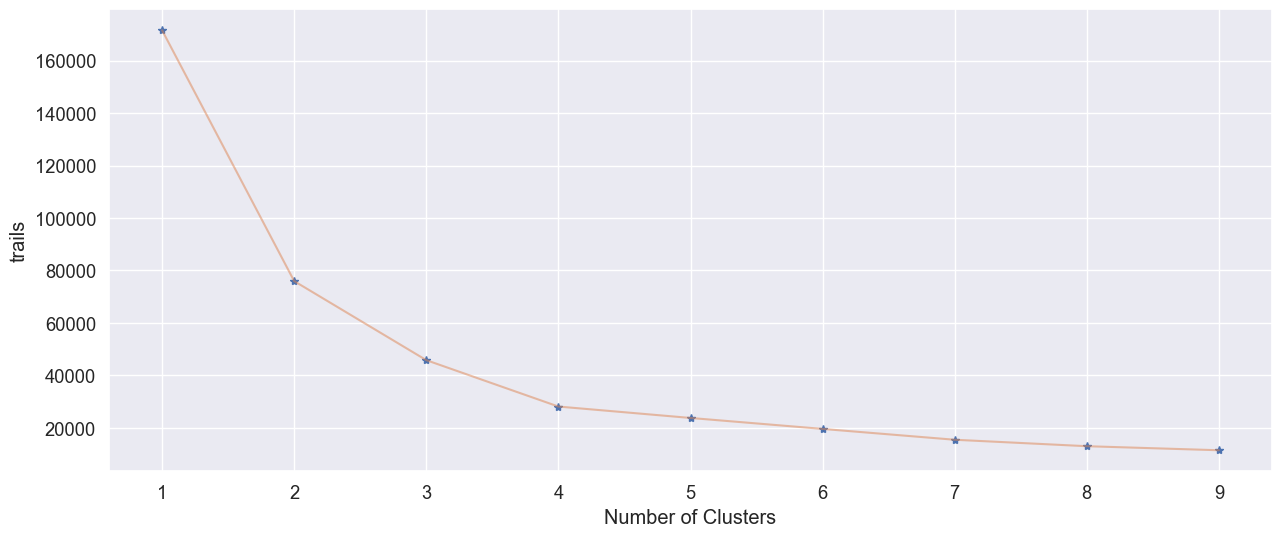

In [54]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , data , '*')
plt.plot(np.arange(1 , 10) , data , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('trails')
plt.show()

<div class="alert alert-block alert-info"> 

in this case i will use k=4 which the point that error start to decrease.
.</div>


In [55]:
kmeans = KMeans(n_clusters = 4, random_state = 45)
k_fit = kmeans.fit(df_one)
clusters = k_fit.labels_

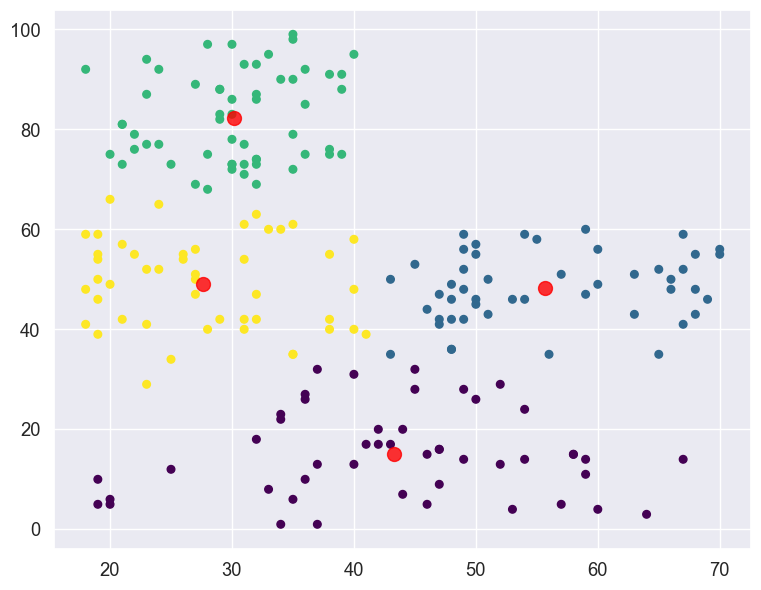

In [56]:
plt.figure(figsize = [9, 7], clear = False)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_
plt.scatter(df_one['age'],df_one['spending_score'],c = clusters,s = 30,cmap = "viridis")
plt.scatter(centers[:, 0],centers[:, 1],c = "red",s = 100,alpha = 0.8);

In [57]:
data = pd.DataFrame({"customer_id": df['customer_id'], "Group": (k_fit.labels_ + 1)})
data.head(10)

,customer_id,Group
0,1,4
1,2,3
2,3,1
3,4,3
4,5,4
5,6,3
6,7,1
7,8,3
8,9,1
9,10,3


<font size="4" color="blue">**2- clustring between anual income  and spending score**</font> </br>


In [58]:

df_two = df[['annual_income','spending_score']]
data_two=[]
for n in range(1,10):
    kmeans_two = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=400, 
                    tol=0.0001,  random_state= 45 ) )
    kmeans_two.fit(df_two)
    data_two.append(kmeans_two.inertia_)

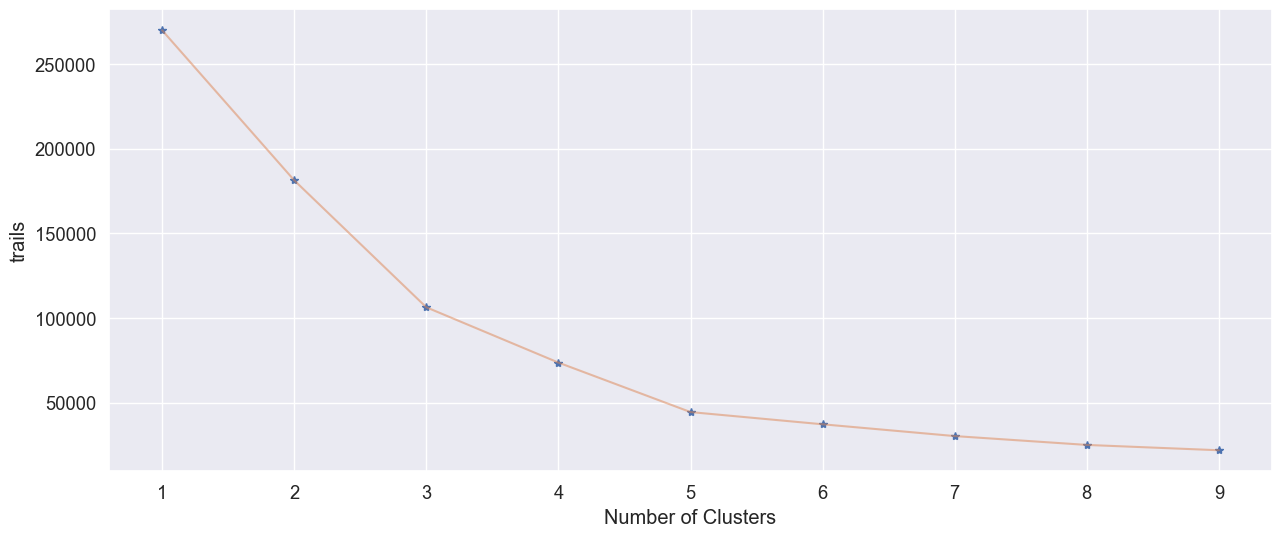

In [59]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , data_two , '*')
plt.plot(np.arange(1 , 10) , data_two , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('trails')
plt.show()

<div class="alert alert-block alert-info"> 

in this case i will use k=5 which the point that error start to decrease.
.</div>


In [60]:
kmeans = KMeans(n_clusters = 5, random_state = 45)
k_fit = kmeans.fit(df_two)
clusters = k_fit.labels_

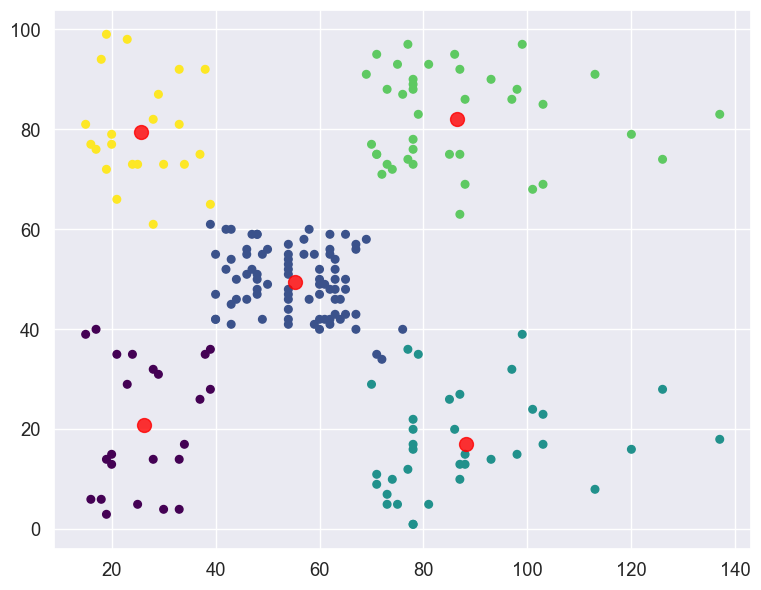

In [61]:
plt.figure(figsize = [9, 7], clear = False)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_
plt.scatter(df_two['annual_income'],df_two['spending_score'],c = clusters,s = 30,cmap = "viridis")
plt.scatter(centers[:, 0],centers[:, 1],c = "red",s = 100,alpha = 0.8);

In [62]:
data_ = pd.DataFrame({"customer_id": df['customer_id'], "Group": (k_fit.labels_ + 1)})
data_.head( 100)

,customer_id,Group
0,1,1
1,2,5
2,3,1
3,4,5
4,5,1
...,...,...
95,96,2
96,97,2
97,98,2
98,99,2


<font size="4" color="blue">**3- clustring between age  anual income  and spending score**</font> </br>


In [63]:

df_three = df[['age','spending_score','annual_income']]
data=[]
for n in range(1,10):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=400, tol=0.0001,  random_state= 45 ) )            
    kmeans.fit(df_three)
    data.append(kmeans.inertia_)
    

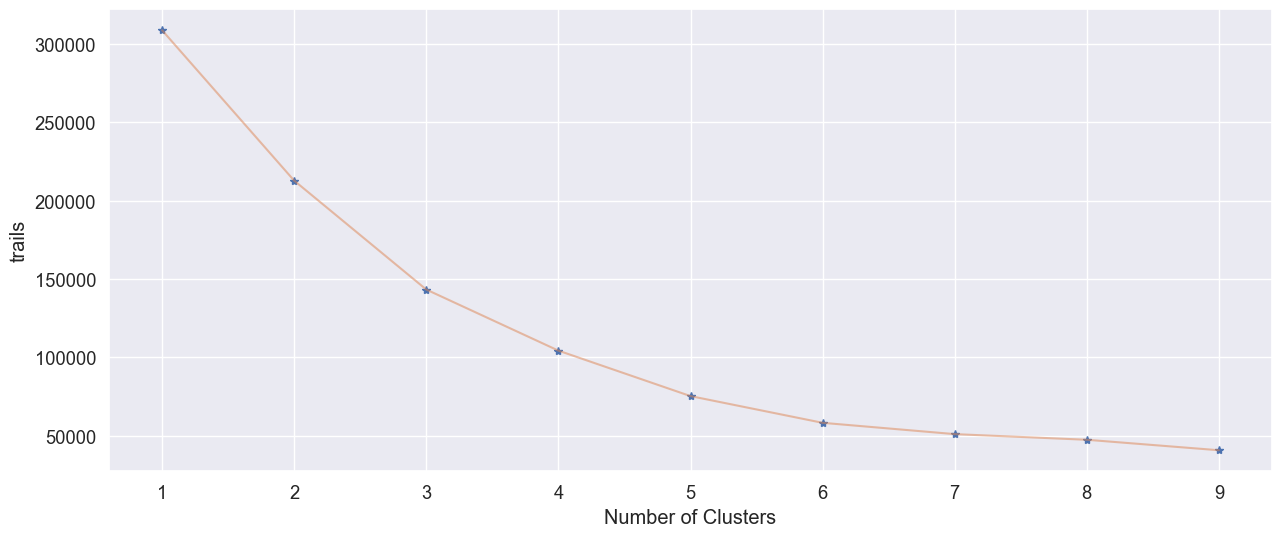

In [64]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , data , '*')
plt.plot(np.arange(1 , 10) , data , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('trails')
plt.show()

In [65]:
kmeans = KMeans(n_clusters = 6, random_state = 45)
k_fit = kmeans.fit(df_three)
clusters = k_fit.labels_

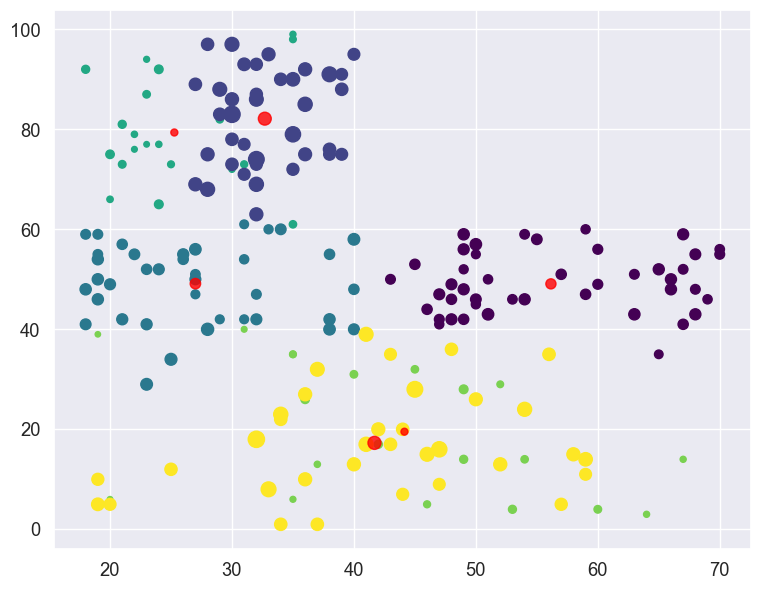

In [66]:
plt.figure(figsize = [9, 7], clear = False)
clusters = k_fit.labels_
centers = k_fit.cluster_centers_
plt.scatter(df_three['age'],df_three['spending_score'],df_three['annual_income'],c = clusters,cmap = "viridis")
plt.scatter(centers[:, 0],centers[:, 1],centers[:,2],c = "red",alpha = 0.8);

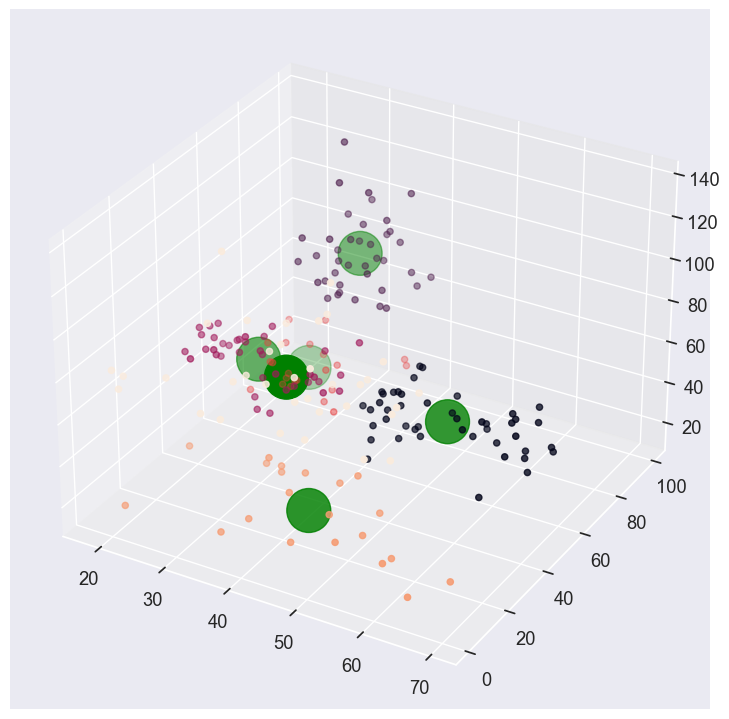

In [67]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_three['age'],df_three['spending_score'],df_three['annual_income'], c = clusters)
ax.scatter(centers[:, 0],centers[:, 1],centers[:,2],marker = 'o',c = "green", s = 1000); 

In [68]:
data_3 = pd.DataFrame({"customer_id": df['customer_id'], "Group": (k_fit.labels_ + 1)})
data_3.head(10)

,customer_id,Group
0,1,5
1,2,4
2,3,5
3,4,4
4,5,5
5,6,4
6,7,5
7,8,4
8,9,5
9,10,4
